In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
%pip install sklearn

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/dd/8a/76c34f0483a66e266c64c6110fa5b06004b8934fff3fcab65c218dd6e48c/tensorflow-2.15.0-cp310-cp310-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/98/35/844093df99983773f2c33be2f332047e1a531998f67da712358250cbf5e8/tensorflow_macos-2.15.0-cp310-cp310-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Obtaining depen

In [2]:
import ts_models

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('data/^NSEI.csv')

In [6]:
df=df.fillna(method='bfill')

/var/folders/hx/1phd19s5067b0x8jbb0v3scc0000gp/T/ipykernel_77272/2473633532.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='bfill')


In [7]:
import tensorflow as tf

In [8]:
data=np.array(df['Open'])

#### UNIVARIATE FITTING FOR TCS SHARE PRICE FROM 2017 TO 30 JAN 2023

In [9]:
from ts_models import univariate_ts_rnn
model=univariate_ts_rnn(epochs=1000,
                        batch_size=32,
                        hidden_layers=128,
                        time_steps=30,
                       normalize=True,
                       split=0.58)

Text(0.5, 0, 'timestep')

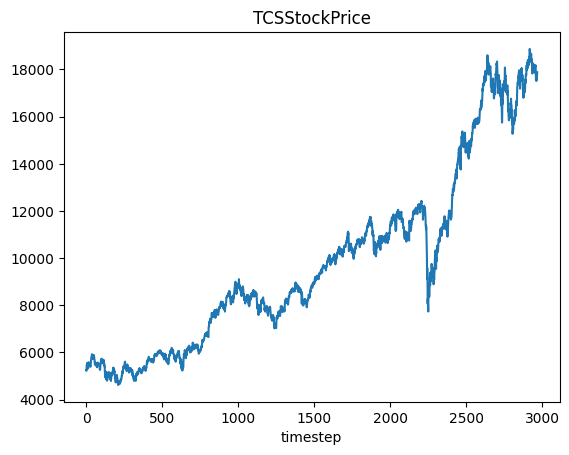

In [10]:
plt.plot(data)
plt.title('TCSStockPrice')
plt.xlabel('timestep')

Epoch 1/1000
2/2 - 0s - loss: 0.0969 - mean_absolute_percentage_error: 189.8435 - val_loss: 0.0537 - val_mean_absolute_percentage_error: 22.8232 - 320ms/epoch - 160ms/step
Epoch 2/1000
2/2 - 0s - loss: 0.0075 - mean_absolute_percentage_error: 262.2032 - val_loss: 0.1438 - val_mean_absolute_percentage_error: 48.4064 - 15ms/epoch - 7ms/step
Epoch 3/1000
2/2 - 0s - loss: 0.0043 - mean_absolute_percentage_error: 99.1148 - val_loss: 0.1417 - val_mean_absolute_percentage_error: 47.2970 - 14ms/epoch - 7ms/step
Epoch 4/1000
2/2 - 0s - loss: 0.0023 - mean_absolute_percentage_error: 105.5432 - val_loss: 0.0825 - val_mean_absolute_percentage_error: 30.0718 - 14ms/epoch - 7ms/step
Epoch 5/1000
2/2 - 0s - loss: 0.0013 - mean_absolute_percentage_error: 169.5674 - val_loss: 0.0575 - val_mean_absolute_percentage_error: 22.5539 - 13ms/epoch - 7ms/step
Epoch 6/1000
2/2 - 0s - loss: 0.0028 - mean_absolute_percentage_error: 185.1288 - val_loss: 0.0622 - val_mean_absolute_percentage_error: 23.9476 - 14ms/e

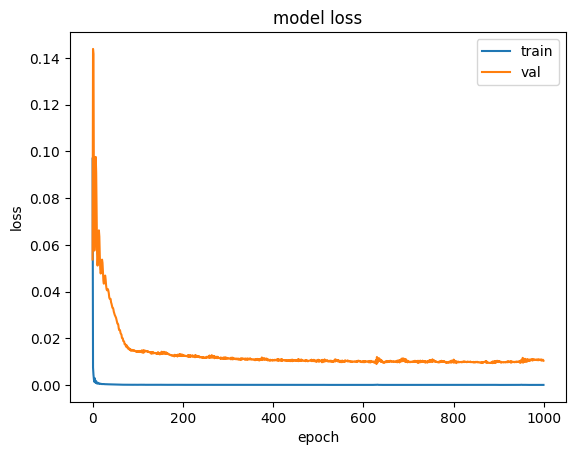

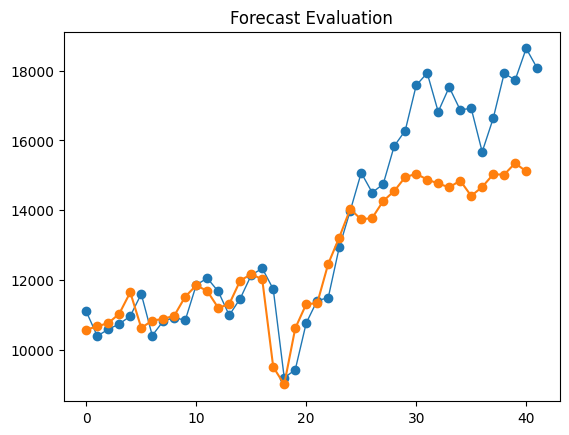

(MinMaxScaler(),
 array([[11095.599609],
        [10389.5     ],
        [10586.5     ],
        [10736.400391],
        [10963.5     ],
        [11598.75    ],
        [10405.849609],
        [10820.450195],
        [10920.849609],
        [10842.650391],
        [11856.150391],
        [12052.650391],
        [11670.75    ],
        [10987.799805],
        [11466.299805],
        [12137.049805],
        [12333.099609],
        [11738.549805],
        [ 9196.400391],
        [ 9422.200195],
        [10764.099609],
        [11409.650391],
        [11487.799805],
        [12932.5     ],
        [13980.900391],
        [15073.25    ],
        [14506.299805],
        [14749.400391],
        [15839.349609],
        [16281.349609],
        [17580.900391],
        [17935.050781],
        [16824.25    ],
        [17529.449219],
        [16876.650391],
        [16924.449219],
        [15674.25    ],
        [16632.900391],
        [17923.349609],
        [17736.349609],
        [18638.849609],

In [11]:
model.train(data=data)

#### MULTIVARIATE TIME SERIES FORECASTING FOR NFLX, AMZ,DPZ

In [13]:
from ts_models import multivariate_ts_lstm

In [14]:
model=multivariate_ts_lstm(n_past_days=21,batch_size=32)

In [15]:
import sklearn
import pandas as pd
import numpy as np
data=pd.read_csv('data/portfolio_data.csv')[['AMZN','NFLX','DPZ']]
data=sklearn.preprocessing.MinMaxScaler().fit_transform(data)
data=np.array(data)

In [16]:
data

array([[0.        , 0.00244266, 0.        ],
       [0.00241169, 0.00302215, 0.00321824],
       [0.00548211, 0.00264071, 0.00507347],
       ...,
       [0.91652336, 0.85127306, 0.91809901],
       [0.87895251, 0.81076018, 0.8999536 ],
       [0.88868853, 0.81165869, 0.89583139]])

Total number of samples in the original training data =  1140
Total number of samples in the generated data =  35
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 21, 50)            10800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 32)                1632      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 32731 (127.86 KB)
Trainable params: 32731 (127.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50


/Users/ved14/Desktop/extracurriculars/ForecastPro-1/ts_models.py:218: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  verbose=2,


35/35 - 2s - loss: 0.0135 - mean_absolute_percentage_error: 92.5571 - val_loss: 0.0358 - val_mean_absolute_percentage_error: 20.6946 - 2s/epoch - 49ms/step
Epoch 2/50
35/35 - 0s - loss: 0.0022 - mean_absolute_percentage_error: 34.9846 - val_loss: 0.0793 - val_mean_absolute_percentage_error: 26.2081 - 376ms/epoch - 11ms/step
Epoch 3/50
35/35 - 0s - loss: 0.0013 - mean_absolute_percentage_error: 27.5256 - val_loss: 0.0820 - val_mean_absolute_percentage_error: 28.3776 - 394ms/epoch - 11ms/step
Epoch 4/50
35/35 - 0s - loss: 0.0011 - mean_absolute_percentage_error: 32.1400 - val_loss: 0.0613 - val_mean_absolute_percentage_error: 24.2627 - 414ms/epoch - 12ms/step
Epoch 5/50
35/35 - 0s - loss: 0.0018 - mean_absolute_percentage_error: 37.4633 - val_loss: 0.0953 - val_mean_absolute_percentage_error: 30.0641 - 428ms/epoch - 12ms/step
Epoch 6/50
35/35 - 0s - loss: 0.0014 - mean_absolute_percentage_error: 32.4615 - val_loss: 0.0585 - val_mean_absolute_percentage_error: 23.9761 - 406ms/epoch - 12ms

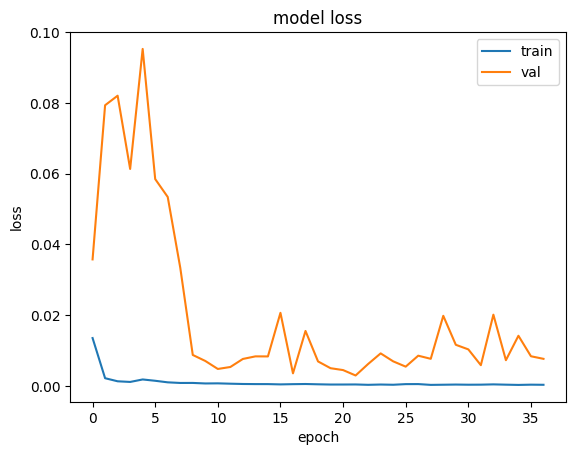

12/12 [==============================] - 0s 2ms/step


In [17]:
test,predictions=model.train_predict(data)

In [9]:
test.shape

(380, 3)

In [10]:
predictions.shape

(359, 3)

In [1]:
print(predictions.length())

NameError: name 'predictions' is not defined

In [23]:
print(type(predictions))

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Stock')

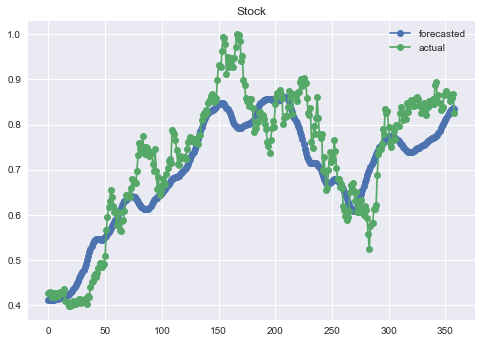

In [30]:
import matplotlib.pyplot as plt
temp_df=pd.concat([pd.DataFrame(predictions[:,1]),pd.DataFrame(test[:len(predictions),1])],axis=1)
temp_df.plot(linewidth=1.7,marker = 'o')
plt.legend(['forecasted','actual'])
plt.title('Stock')

Text(0.5, 1.0, 'Relative Error Density')

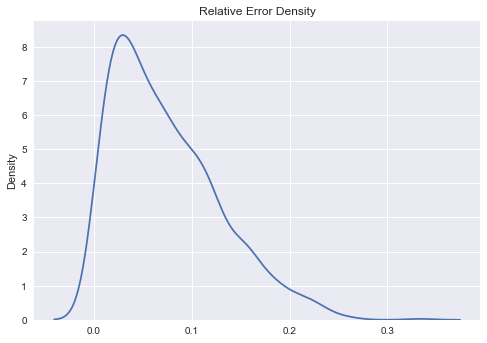

In [31]:
import seaborn as sns
import numpy as np
sns.kdeplot(np.abs((test[:len(predictions)]-predictions).flatten()/(test[:len(predictions)]).flatten()))
plt.title('Relative Error Density')

In [32]:
(test[:len(predictions)]-predictions).flatten().mean()

-0.008829427746121296